In [11]:
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import requests
from user_agent import generate_user_agent
import numpy as np

In [2]:
# Spilberg
url = 'https://www.kinopoisk.ru/name/22260/#!/sort/vote/' 
header = generate_user_agent()
response = requests.get(url, headers = {'User-Afent':header})
# if 200 - everything is ok
response.status_code

200

In [3]:
# our page will be here
soup = BeautifulSoup(response.text,'html.parser')

In [4]:
# getting all links from the page
links = []
for link in soup.find_all('a'):
    link = str(link).replace('\n','')
    links.append(link)

In [5]:
# votes - is the specific link
rvotes = re.compile(r'<a href="\/film\/.*\/votes\/">\s*\d{1,2}\.\d{1,2}')

In [6]:
votes = []
for _ in range(len(links)):
    vote = rvotes.findall(links[_])
    if len(vote) > 0:
        votes.append(str(vote))
    

In [7]:
# getting actual rate
rrate = re.compile(r'\d{1,2}\.\d{1,2}')


In [8]:
# all rates from the vote links
rates = []
for _ in range(len(votes)):
    rate = rrate.findall(votes[_])[0]
    if (len(rate)>0):
        rates.append(float(rate))

In [9]:
# here they are 
rates

[7.6,
 6.73,
 5.57,
 6.58,
 6.53,
 6.1,
 7.48,
 6.0,
 6.86,
 6.7,
 6.86,
 7.76,
 7.47,
 6.52,
 6.1,
 6.94,
 6.91,
 7.23,
 6.83,
 7.79,
 8.01,
 7.74,
 6.72,
 7.4,
 7.62,
 6.92,
 5.93,
 6.86,
 6.86,
 6.94,
 6.53,
 7.58,
 6.51,
 7.16,
 7.14,
 7.12,
 7.41,
 7.55,
 7.61,
 7.03,
 7.12,
 6.92,
 7.41,
 7.96,
 6.97,
 7.82,
 7.1,
 7.57,
 7.3,
 6.84,
 6.66,
 7.92,
 7.98,
 6.05,
 6.25,
 6.47,
 5.87,
 7.51,
 7.27,
 7.06,
 7.26,
 7.97,
 7.25,
 6.3,
 7.01,
 6.12,
 7.13,
 6.54,
 7.2,
 5.94,
 6.45,
 7.33,
 7.85,
 5.96,
 6.08,
 5.14,
 6.62,
 6.57,
 7.97,
 7.21,
 6.75,
 7.21,
 7.27,
 6.63,
 6.71,
 6.72,
 6.38,
 6.86,
 7.8,
 6.2,
 6.99,
 6.98,
 6.57,
 7.82,
 7.68,
 7.91,
 7.09,
 7.28,
 6.8,
 7.57,
 7.55,
 7.93,
 6.9,
 7.21,
 7.24,
 7.2,
 7.4,
 6.78,
 7.02,
 7.78,
 6.43,
 6.89,
 7.62,
 5.43,
 7.6,
 6.73,
 6.1,
 7.48,
 6.91,
 7.74,
 7.4,
 6.06,
 6.87,
 7.41,
 7.08,
 7.75,
 7.92,
 5.59,
 7.26,
 7.04,
 7.76,
 7.24,
 6.99,
 7.91,
 7.93,
 7.21,
 7.87,
 6.78,
 7.78,
 6.37,
 7.25,
 7.34,
 6.96,
 7.62,
 4.74,
 7.6

In [12]:
# mean
np.mean(rates)

6.757446808510639

(array([ 5.,  8., 14., 16., 34., 33., 48., 50., 32., 38.,  4.]),
 array([4.53      , 4.87727273, 5.22454545, 5.57181818, 5.91909091,
        6.26636364, 6.61363636, 6.96090909, 7.30818182, 7.65545455,
        8.00272727, 8.35      ]),
 <a list of 11 Patch objects>)

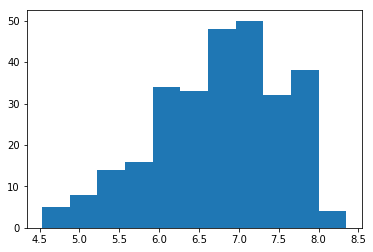

In [13]:
# histogram 
plt.hist(rates, bins='auto')